In [1]:
# Importation des librairies
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.colors import hex2color

import seaborn as sns
import plotly.express as px

import datetime as dt
import scipy.stats as st
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [2]:
conf_graph = {
  'set_style': {
    'axes.spines.bottom': False,
    'axes.spines.right': False,
    'axes.spines.left': False,
    'axes.spines.top': False,
    'axes.grid': True,
    'grid.color': '.9'},
  'title_style': {
    'loc': 'left',
    'fontsize': 20,
    'fontweight': 'bold',
    'color': '#000000'},
  'label_style': {
    'fontsize': 15,
    'fontweight': 'bold',
    'color': '#000000'},
  'tick_style': {
    'fontsize': 10,
    'fontweight': 'bold',
    'color': '#000000'},
  'rotation': {
    'rotation': '20',
    'horizontalalignment': 'right'},
  'legend_style': {
      'weight': 'bold',
      'size': 10},
  'dscolors': {
    'pink': '#DA9BEA',
    'lilac': '#959FF5',
    'blue': '#4FD7DB',
    'green': '#89F594',
    'yellow': '#EBEA8A',
    'orange': '#FAC19D'}}

sns.set_style("white", conf_graph['set_style'])
palette = sns.color_palette(list(conf_graph['dscolors'].values()))


def NonLinCdict(steps, hexcol_array):
    """Fonction pour faire un mapping de couleur pour seaborn."""
    cdict = {'yellow': (), 'green': (), 'blue': ()}
    for s, hexcol in zip(steps, hexcol_array):
        rgb = hex2color(hexcol)
        cdict['yellow'] = cdict['yellow'] + ((s, rgb[0], rgb[0]),)
        cdict['green'] = cdict['green'] + ((s, rgb[1], rgb[1]),)
        cdict['blue'] = cdict['blue'] + ((s, rgb[2], rgb[2]),)

    return cdict


cdict = NonLinCdict([0, 1], palette)
cm = LinearSegmentedColormap('MDM', cdict)

In [3]:
# Télécharger les données et afficher le dataset
df_oc=pd.read_csv('df_oc.csv')

In [4]:
df_oc

,id_salarié,Contrat,Temps_trav,Salaire_brut_mens,Ancienneté_an,Service,Sexe,Age
0,16990924-2829,CDI,Temps complet,9873.5000,22.5,Consultant,Femme,47
1,16990414-3527,CDI,Temps complet,4296.7167,10.8,Consultant,Homme,67
2,16981206-3817,CDI,Temps complet,3705.2167,13.0,RH,Femme,53
3,16970415-1050,CDI,Temps complet,1697.1500,21.7,Consultant,Homme,59
4,16960906-7989,CDD,Temps complet,2848.3000,3.3,R&D,Homme,40
...,...,...,...,...,...,...,...,...
251,16020725-8401,CDI,Temps complet,7304.2667,7.9,Consultant,Femme,44
252,16020701-3376,CDI,Temps complet,8328.0167,10.2,Compta Finances,Femme,41
253,16020327-1465,CDI,Temps partiel,8860.8000,11.9,RH,Femme,49
254,16011205-0331,CDI,Temps partiel,4974.3200,11.8,Commercial,Femme,66


In [5]:
# Afficher le résumé complet de df_oc
df_oc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 256 entries, 0 to 255
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id_salarié         256 non-null    object 
 1   Contrat            256 non-null    object 
 2   Temps_trav         256 non-null    object 
 3   Salaire_brut_mens  256 non-null    float64
 4   Ancienneté_an      256 non-null    float64
 5   Service            256 non-null    object 
 6   Sexe               256 non-null    object 
 7   Age                256 non-null    int64  
dtypes: float64(2), int64(1), object(5)
memory usage: 16.1+ KB


bleu=#B1E9F0
rose=#F7C1EC
violet=#A0A5DE

# IV) Cas d'étude
## IV.a) Répartition des salariés selon le genre

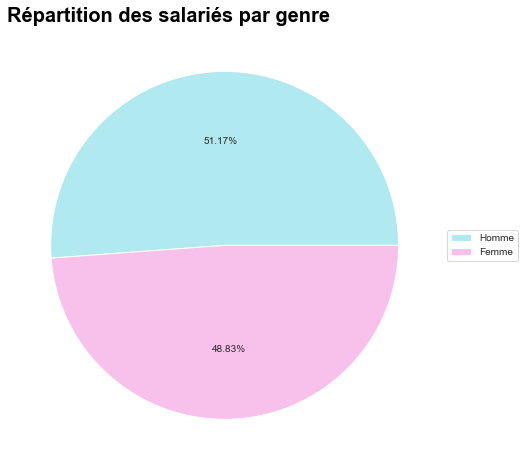

In [6]:
plt.figure(figsize = (12,8))
plt.pie(df_oc["Sexe"].value_counts(), autopct = "%0.2f%%", colors=["#B1E9F0","#F7C1EC"])
plt.title("Répartition des salariés par genre", **conf_graph["title_style"])
plt.legend(df_oc["Sexe"].value_counts().index, loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

plt.savefig('OC_01_pie_sexe.png')
plt.show()

In [11]:
df_oc.groupby(["Sexe"]).count()

,id_salarié,Contrat,Temps_trav,Salaire_brut_mens,Ancienneté_an,Service,Age
Sexe,,,,,,,
Femme,125,125,125,125,125,125,125
Homme,131,131,131,131,131,131,131


## IV.b) EMBAUCHE: Répartition par service

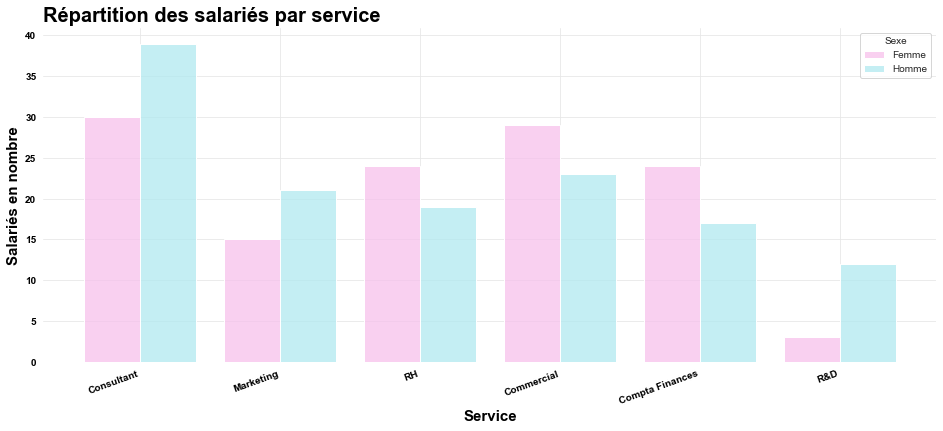

In [12]:
df_graph=df_oc.copy()
df_graph=df_graph.sort_values("Sexe")

plt.figure(figsize=(16,8))
plt.gcf().subplots_adjust(bottom=0.3)

sns.histplot(df_graph, x="Service", shrink=0.8, hue="Sexe", multiple="dodge", palette=["#F7C1EC","#B1E9F0"])
plt.title("Répartition des salariés par service", **conf_graph["title_style"])
plt.xlabel("Service", **conf_graph["label_style"])
plt.ylabel("Salariés en nombre", **conf_graph["label_style"])
plt.xticks(**conf_graph["tick_style"], **conf_graph["rotation"])
plt.yticks(**conf_graph["tick_style"])


plt.savefig('OC_02_bar_service_sexe.png')
plt.show()

del df_graph

In [13]:
# Calcul du % de femmes selon le service

x = "Service"
y = "Sexe"

service = df_oc[[x,y]].pivot_table(index=x,columns=y,aggfunc=len).fillna(0).copy().astype(int)

service["Ensemble"] = service["Femme"] + service["Homme"]
service["% de femmes"] = (100*(service["Femme"] / service["Ensemble"])).round(2)
service.sort_values('% de femmes', ascending=False)

Sexe,Femme,Homme,Ensemble,% de femmes
Service,,,,
Compta Finances,24,17,41,58.54
RH,24,19,43,55.81
Commercial,29,23,52,55.77
Consultant,30,39,69,43.48
Marketing,15,21,36,41.67
R&D,3,12,15,20.00


## IV.c) EMBAUCHE: Répartition selon l'âge

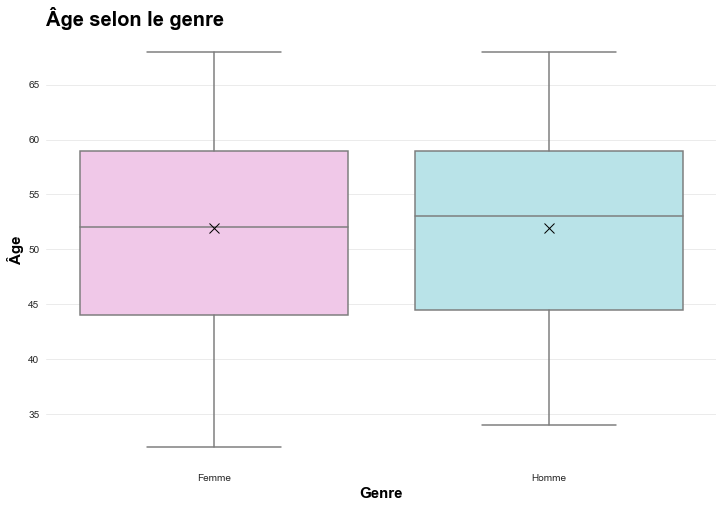

In [14]:
#Représentation des âges selon leur genre
df_graph=df_oc.copy()
df_graph=df_graph.sort_values("Sexe")

plt.figure(figsize=(12,8))
sns.boxplot(x = 'Sexe', y = 'Age', data=df_graph, palette=["#F7C1EC","#B1E9F0"],
            showmeans=True,meanprops={"marker": "x","markeredgecolor": "black","markersize": "10"})

plt.title('Âge selon le genre', **conf_graph["title_style"])
plt.xlabel('Genre', **conf_graph["label_style"])
plt.ylabel('Âge', **conf_graph["label_style"])

plt.savefig('OC_03_box_age_sex.png')
plt.show()

del df_graph

In [15]:
# Affichage des mesures centrales et de dispersion concernant l'âge 
age = df_oc.groupby(['Sexe']).describe()
age = age["Age"].copy()
age

,count,mean,std,min,25%,50%,75%,max
Sexe,,,,,,,,
Femme,125.0,51.936000,9.189531,32.0,44.0,52.0,59.0,68.0
Homme,131.0,51.916031,8.925364,34.0,44.5,53.0,59.0,68.0


## IV.d) CONDITIONS DE TRAVAIL: Répartition selon type de contrat

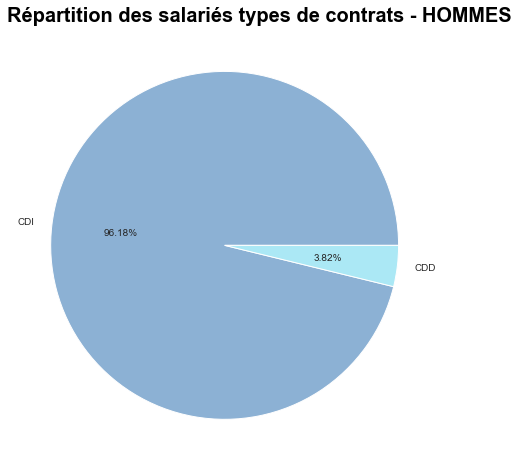

In [16]:
temp_men = df_oc.loc[df_oc["Sexe"].isin(["Homme"])]

plt.figure(figsize = (12,8))
plt.pie(temp_men["Contrat"].value_counts(), labels=df_oc["Contrat"].value_counts().index
        , autopct = "%0.2f%%", colors=["#8CB1D4","#ABE8F5"])
plt.title("Répartition des salariés types de contrats - HOMMES", **conf_graph["title_style"])

plt.savefig('OC_04_pie_contrats_men.png')
plt.show()

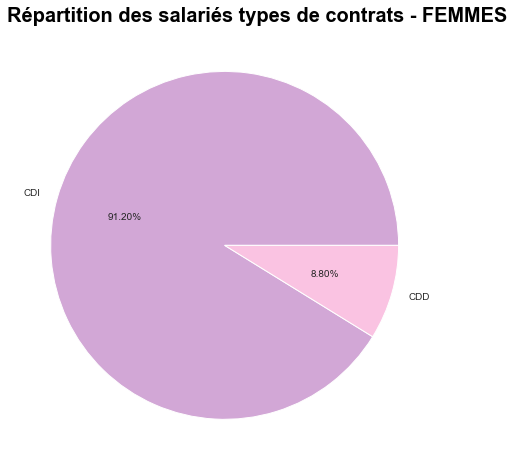

In [17]:
temp_wom = df_oc.loc[df_oc["Sexe"].isin(["Femme"])]

plt.figure(figsize = (12,8))
plt.pie(temp_wom["Contrat"].value_counts(), labels=df_oc["Contrat"].value_counts().index
        , autopct = "%0.2f%%", colors=["#D2A7D6","#FAC3E2"])
plt.title("Répartition des salariés types de contrats - FEMMES", **conf_graph["title_style"])

plt.savefig('OC_05_pie_contrats_wom.png')
plt.show()

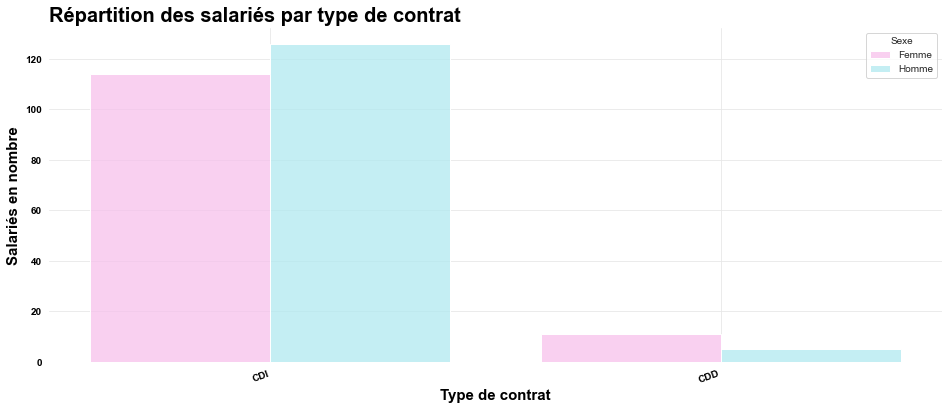

In [18]:
df_graph=df_oc.copy()
df_graph=df_graph.sort_values("Sexe")

plt.figure(figsize=(16,8))
plt.gcf().subplots_adjust(bottom=0.3)

sns.histplot(df_graph, x="Contrat", shrink=0.8, hue="Sexe", multiple="dodge", palette=["#F7C1EC","#B1E9F0"])

plt.title("Répartition des salariés par type de contrat", **conf_graph["title_style"])
plt.xlabel("Type de contrat", **conf_graph["label_style"])
plt.ylabel("Salariés en nombre", **conf_graph["label_style"])
plt.xticks(**conf_graph["tick_style"], **conf_graph["rotation"])
plt.yticks(**conf_graph["tick_style"])

plt.savefig('OC_06_bar_contrat_sexe.png')
plt.show()

del df_graph

In [19]:
# Calcul du % de femmes selon le type de contrat
x = "Contrat"
y = "Sexe"

contrat = df_oc[[x,y]].pivot_table(index=x,columns=y,aggfunc=len).fillna(0).copy().astype(int)

contrat["Ensemble"] = contrat["Femme"] + contrat["Homme"]
contrat["% de femmes"] = (100*(contrat["Femme"] / contrat["Ensemble"])).round(2)
contrat["Ratio femmes / hommes"] = (contrat["Homme"]/contrat["Femme"]).round(2)
contrat["Ratio hommes / femmes"] = (contrat["Femme"]/contrat["Homme"]).round(2)
contrat

Sexe,Femme,Homme,Ensemble,% de femmes,Ratio femmes / hommes,Ratio hommes / femmes
Contrat,,,,,,
CDD,11,5,16,68.75,0.45,2.2
CDI,114,126,240,47.50,1.11,0.9


In [20]:
# Affichage des mesures centrales et de dispersion concernant le type de contrat, selon l'ancienneté chez les hommes
df_oc.loc[df_oc["Sexe"] == 'Homme'].groupby("Contrat")["Ancienneté_an"].describe().round(2)

,count,mean,std,min,25%,50%,75%,max
Contrat,,,,,,,,
CDD,5.0,1.60,1.10,0.3,1.20,1.40,1.80,3.3
CDI,126.0,14.66,6.41,2.9,8.82,15.05,20.48,24.9


In [21]:
# Affichage des mesures centrales et de dispersion concernant le type de contrat, selon l'ancienneté chez les femmes
df_oc.loc[df_oc["Sexe"] == 'Femme'].groupby("Contrat")["Ancienneté_an"].describe().round(2)

,count,mean,std,min,25%,50%,75%,max
Contrat,,,,,,,,
CDD,11.0,1.20,0.48,0.4,0.95,1.10,1.55,1.9
CDI,114.0,13.17,6.59,2.5,7.95,11.95,18.00,25.0


## IV.e) CONDITIONS DE TRAVAIL: Répartition selon la durée de travail

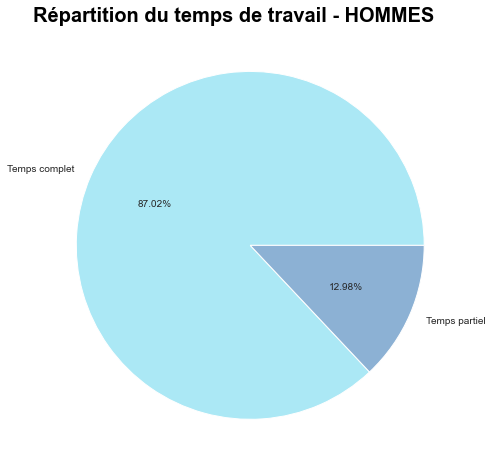

In [22]:
plt.figure(figsize = (12,8))
plt.pie(temp_men["Temps_trav"].value_counts(), labels=df_oc["Temps_trav"].value_counts().index
        , autopct = "%0.2f%%", colors=["#ABE8F5","#8CB1D4"])
plt.title("Répartition du temps de travail - HOMMES", **conf_graph["title_style"])

plt.savefig('OC_07_pie_durée_men.png')
plt.show()

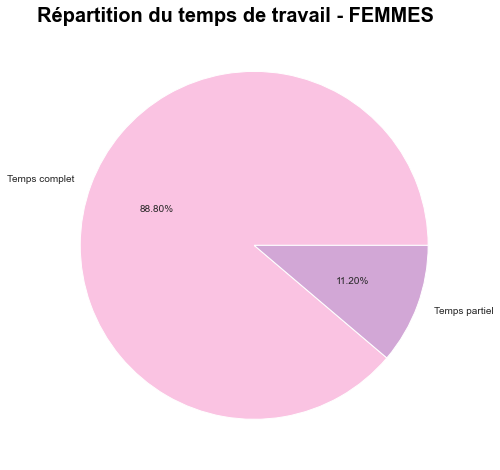

In [23]:
plt.figure(figsize = (12,8))
plt.pie(temp_wom["Temps_trav"].value_counts(), labels=df_oc["Temps_trav"].value_counts().index
        , autopct = "%0.2f%%", colors=["#FAC3E2","#D2A7D6"])
plt.title("Répartition du temps de travail - FEMMES", **conf_graph["title_style"])

plt.savefig('OC_08_pie_durée_men.png')
plt.show()

In [24]:
# Calcul du % de femmes selon le type de contrat
x = "Temps_trav"
y = "Sexe"

duree = df_oc[[x,y]].pivot_table(index=x,columns=y,aggfunc=len).fillna(0).copy().astype(int)

duree["Ensemble"] = duree["Femme"] + duree["Homme"]
duree["% de femmes"] = (100*(duree["Femme"] / duree["Ensemble"])).round(2)
duree["Ratio femmes / hommes"] = (duree["Homme"]/duree["Femme"]).round(2)
duree["Ratio hommes / femmes"] = (duree["Femme"]/duree["Homme"]).round(2)
duree

Sexe,Femme,Homme,Ensemble,% de femmes,Ratio femmes / hommes,Ratio hommes / femmes
Temps_trav,,,,,,
Temps complet,111,114,225,49.33,1.03,0.97
Temps partiel,14,17,31,45.16,1.21,0.82


## IV.f) Relation entre le Type de contrat et la Durée de travail

In [25]:
x = "Temps_trav"
y = "Contrat"

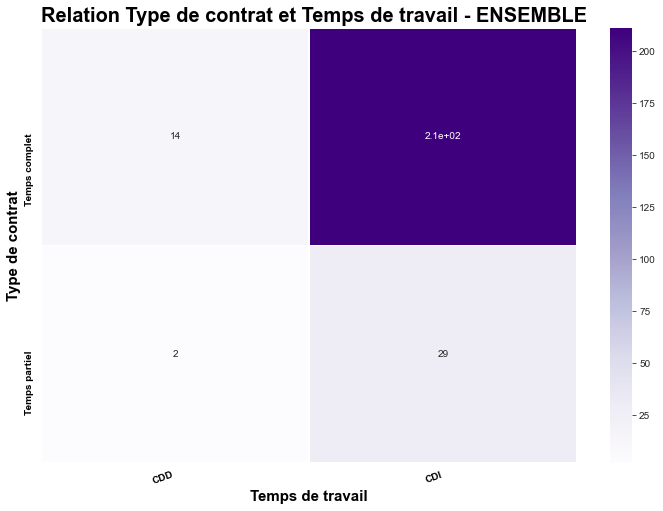

In [26]:
heat_all = df_oc[[x,y]].pivot_table(index=x,columns=y,aggfunc=len).fillna(0).copy().astype(int)

plt.figure(figsize=(12,8))
sns.heatmap(heat_all, linewidths = 0.30, annot = True, cmap="Purples")
plt.title("Relation Type de contrat et Temps de travail - ENSEMBLE", **conf_graph["title_style"])
plt.xlabel('Temps de travail', **conf_graph["label_style"])
plt.ylabel('Type de contrat', **conf_graph["label_style"])
plt.xticks(**conf_graph["tick_style"], **conf_graph["rotation"])
plt.yticks(**conf_graph["tick_style"])

plt.savefig('OC_09_heat_all.png')
plt.show()

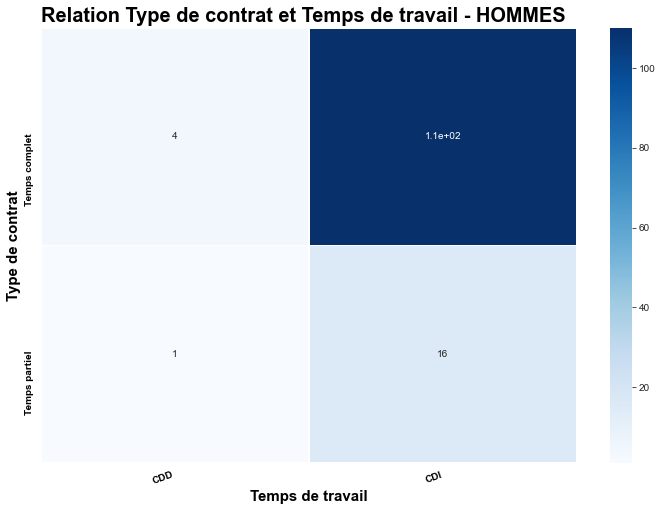

In [27]:
heat_men = temp_men[[x,y]].pivot_table(index=x,columns=y,aggfunc=len).fillna(0).copy().astype(int)

plt.figure(figsize=(12,8))
sns.heatmap(heat_men, linewidths = 0.30, annot = True, cmap="Blues")
plt.title("Relation Type de contrat et Temps de travail - HOMMES", **conf_graph["title_style"])
plt.xlabel('Temps de travail', **conf_graph["label_style"])
plt.ylabel('Type de contrat', **conf_graph["label_style"])
plt.xticks(**conf_graph["tick_style"], **conf_graph["rotation"])
plt.yticks(**conf_graph["tick_style"])

plt.savefig('OC_10_heat_men.png')
plt.show()

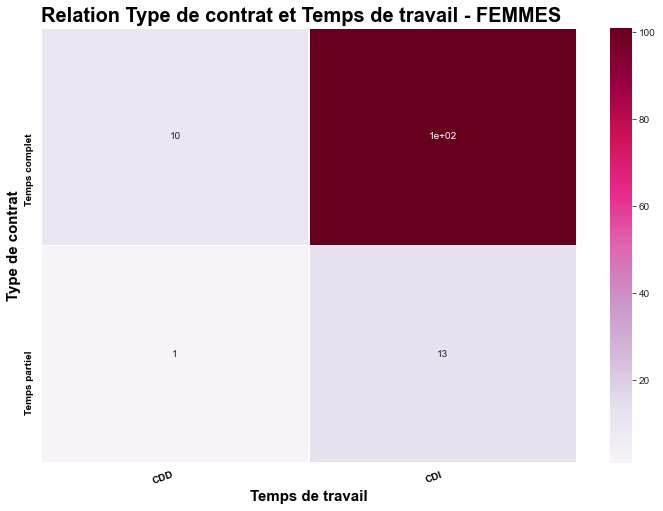

In [28]:
heat_wom = temp_wom[[x,y]].pivot_table(index=x,columns=y,aggfunc=len).fillna(0).copy().astype(int)

plt.figure(figsize=(12,8))
sns.heatmap(heat_wom, linewidths = 0.30, annot = True, cmap="PuRd")
plt.title("Relation Type de contrat et Temps de travail - FEMMES", **conf_graph["title_style"])
plt.xlabel('Temps de travail', **conf_graph["label_style"])
plt.ylabel('Type de contrat', **conf_graph["label_style"])
plt.xticks(**conf_graph["tick_style"], **conf_graph["rotation"])
plt.yticks(**conf_graph["tick_style"])

plt.savefig('OC_11_heat_wom.png')
plt.show()

In [29]:
#Oneway ANOVA via SPICY.STATS
st.f_oneway(df_oc['Age'][df_oc['Temps_trav'] == 'Temps complet'],
            df_oc['Age'][df_oc['Temps_trav'] == 'Temps partiel'])

F_onewayResult(statistic=2.1053618568228054, pvalue=0.14801748080015248)

In [30]:
#Oneway ANOVA via STATSMODELS 
model=ols('Age ~ Temps_trav',data=df_oc).fit()

anova_result = sm.stats.anova_lm(model, typ=2)
print (anova_result)

                  sum_sq     df         F    PR(>F)
Temps_trav    171.217084    1.0  2.105362  0.148017
Residual    20656.372760  254.0       NaN       NaN


## IV.g) REMUNERATION: Indice de Gini et courbe de Lorenz

In [31]:
# Cacul Lorenz ENSEMBLE + Gini
inc = df_oc['Salaire_brut_mens'].values
n = len(inc)
lorenz = np.cumsum(np.sort(inc)) / inc.sum()
lorenz = np.append([0],lorenz) 
xaxis = np.linspace(0-1/n,1+1/n,n+1)

AUC = (lorenz.sum() -lorenz[-1]/2 -lorenz[0]/2)/n 
S = 0.5 - AUC 
gini = 2*S
gini.round(4)

0.27

In [32]:
# Cacul Lorenz MEN + Gini
inc = temp_men['Salaire_brut_mens'].values
n = len(inc)
lorenz_men = np.cumsum(np.sort(inc)) / inc.sum()
lorenz_men = np.append([0],lorenz_men) 
xaxis_men = np.linspace(0-1/n,1+1/n,n+1)

AUC = (lorenz_men.sum() -lorenz_men[-1]/2 -lorenz_men[0]/2)/n 
S = 0.5 - AUC 
gini_men = 2*S
gini_men.round(4)

0.2733

In [33]:
# Calcul Lorenz WOM + Gini
inc = temp_wom['Salaire_brut_mens'].values
n = len(inc)
lorenz_wom = np.cumsum(np.sort(inc)) / inc.sum()
lorenz_wom = np.append([0],lorenz_wom) 
xaxis_wom = np.linspace(0-1/n,1+1/n,n+1)

AUC = (lorenz_wom.sum() -lorenz_wom[-1]/2 -lorenz_wom[0]/2)/n 
S = 0.5 - AUC
gini_wom = 2*S
gini_wom.round(4)

0.2657

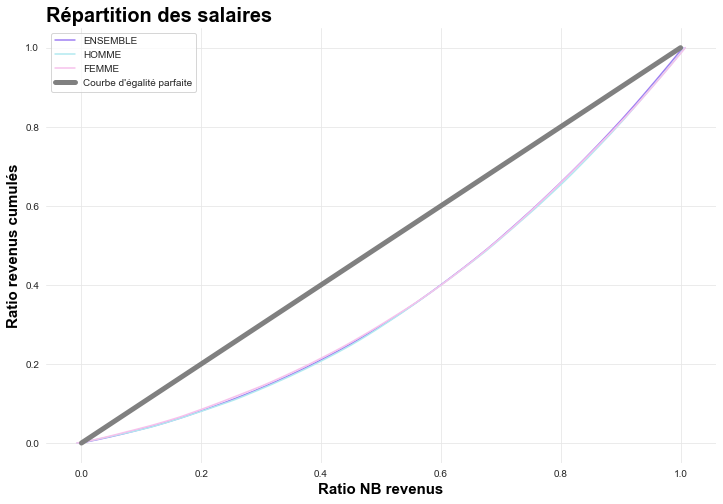

In [34]:
# Visualiser les courbes de Lorenz par sexe
plt.figure(figsize=(12,8))

sns.lineplot(x=xaxis,y=lorenz,label="ENSEMBLE",color="#9F7EF2")
sns.lineplot(x=xaxis_men,y=lorenz_men,label="HOMME",color="#B1E9F0")
sns.lineplot(x=xaxis_wom,y=lorenz_wom,label="FEMME",color="#F7C1EC")

sns.lineplot(x=[0, 1],y=[0, 1], color='grey',lw=5,label="Courbe d'égalité parfaite")

plt.ylabel("Ratio revenus cumulés", **conf_graph["label_style"])
plt.xlabel("Ratio NB revenus", **conf_graph["label_style"])
plt.title("Répartition des salaires", **conf_graph["title_style"])
plt.legend()

plt.savefig('OC_12_line_lorenz.png')
plt.show()

In [35]:
# Comparatif sous forme de tableau des indices de Gini
ar = np.array([[gini,gini_men,gini_wom]])

df_comp = pd.DataFrame(ar, index = ['Indice de Gini'], columns = ['Ensemble', 'Hommes', 'Femmes'])
df_comp

,Ensemble,Hommes,Femmes
Indice de Gini,0.269952,0.273261,0.265695


## IV.h) REMUNERATION: Répartition selon le genre

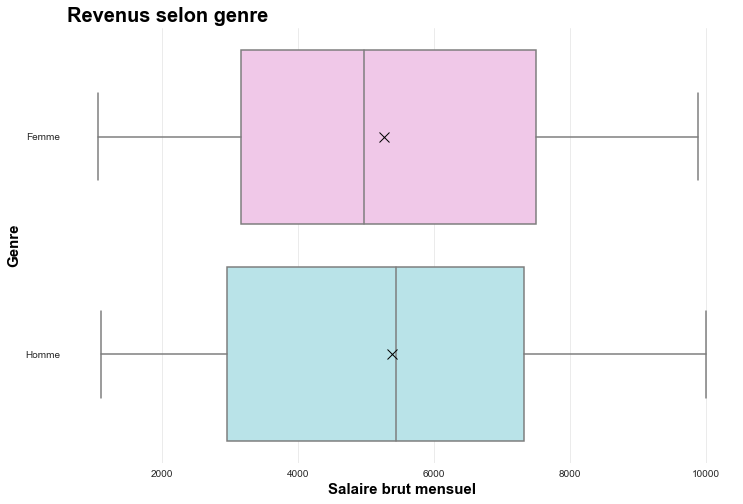

In [36]:
# Répartition des revenus selon le genre
df_graph=df_oc.copy()
df_graph=df_graph.sort_values("Sexe")

plt.figure(figsize=(12,8))
sns.boxplot(x = 'Salaire_brut_mens', y = 'Sexe', data=df_graph, palette=["#F7C1EC","#B1E9F0"],
           showmeans=True,meanprops={"marker": "x","markeredgecolor": "black","markersize": "10"})
plt.title('Revenus selon genre', **conf_graph["title_style"])
plt.xlabel('Salaire brut mensuel', **conf_graph["label_style"])
plt.ylabel('Genre', **conf_graph["label_style"])

plt.savefig('OC_13_box_revenu_sexe.png')
plt.show()

del df_graph

In [37]:
df_oc.describe().round(2)

,Salaire_brut_mens,Ancienneté_an,Age
count,256.00,256.00,256.00
mean,5326.53,13.16,51.93
std,2505.49,7.02,9.04
min,1059.76,0.30,32.00
25%,3111.92,7.38,44.00
50%,5084.62,12.75,52.50
75%,7407.02,19.30,59.00
max,9999.38,25.00,68.00


In [38]:
temp_men.describe().round(2)

,Salaire_brut_mens,Ancienneté_an,Age
count,131.00,131.00,131.00
mean,5383.25,14.16,51.92
std,2568.29,6.77,8.93
min,1110.72,0.30,34.00
25%,2958.26,8.20,44.50
50%,5448.56,14.30,53.00
75%,7313.97,20.40,59.00
max,9999.38,24.90,68.00


In [39]:
temp_wom.describe().round(2)

,Salaire_brut_mens,Ancienneté_an,Age
count,125.00,125.00,125.00
mean,5267.08,12.11,51.94
std,2446.86,7.15,9.19
min,1059.76,0.40,32.00
25%,3165.28,6.30,44.00
50%,4974.32,11.70,52.00
75%,7496.88,17.30,59.00
max,9873.50,25.00,68.00


In [40]:
top10=df_oc.sort_values('Salaire_brut_mens', ascending=False).head(10)
top10

,id_salarié,Contrat,Temps_trav,Salaire_brut_mens,Ancienneté_an,Service,Sexe,Age
6,16960619-9017,CDI,Temps complet,9999.3833,17.8,Marketing,Homme,46
135,16470418-3807,CDI,Temps complet,9978.1500,13.0,Compta Finances,Homme,52
120,16560122-3612,CDI,Temps complet,9940.2333,22.7,Marketing,Homme,47
124,16550903-3725,CDI,Temps complet,9928.1000,10.0,RH,Homme,38
0,16990924-2829,CDI,Temps complet,9873.5000,22.5,Consultant,Femme,47
107,16600919-9578,CDI,Temps complet,9785.5333,17.2,Commercial,Homme,41
248,16030220-7121,CDI,Temps complet,9782.5000,6.3,Consultant,Femme,50
118,16560416-4227,CDI,Temps complet,9777.9500,10.5,Commercial,Femme,47
62,16750821-7945,CDI,Temps complet,9737.0000,7.4,Consultant,Homme,58
201,16240230-3065,CDI,Temps complet,9642.9667,19.0,RH,Homme,60


In [41]:
top10["Salaire_brut_mens"].mean()

9844.53166

In [42]:
top10["Ancienneté_an"].mean()

14.64

In [43]:
top10["Age"].mean()

48.6

## IV.i) REMUNERATION: Répartition selon le genre et l'ancienenté

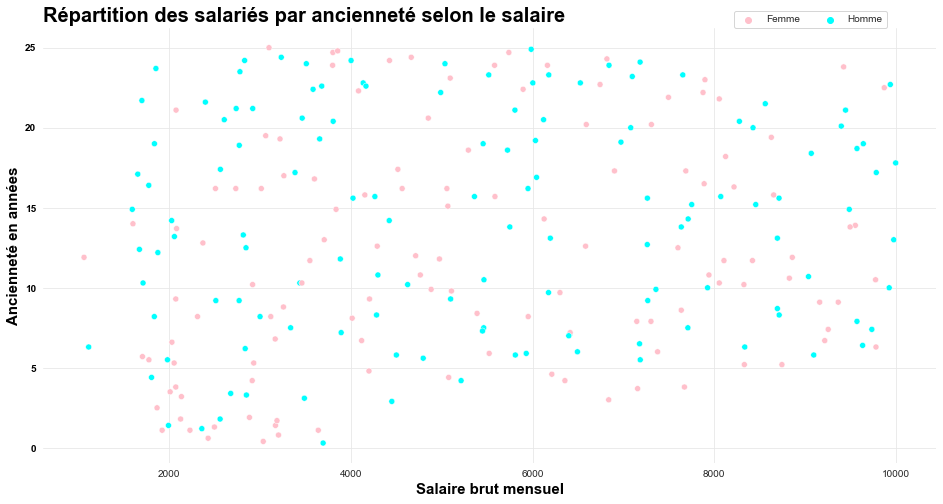

In [44]:
plt.figure(figsize=(16,8))
sns.scatterplot(x="Salaire_brut_mens", y="Ancienneté_an", hue="Sexe", data=df_oc, palette=["pink","cyan"])

plt.title("Répartition des salariés par ancienneté selon le salaire", **conf_graph["title_style"])
plt.xlabel("Salaire brut mensuel", **conf_graph["label_style"])
plt.ylabel("Ancienneté en années", **conf_graph["label_style"])
plt.yticks(**conf_graph["tick_style"])
plt.legend(bbox_to_anchor =(0.95,1.05), ncol = 2)

plt.savefig('OC_14_scatter_revenu_ancienneté.png')
plt.show()

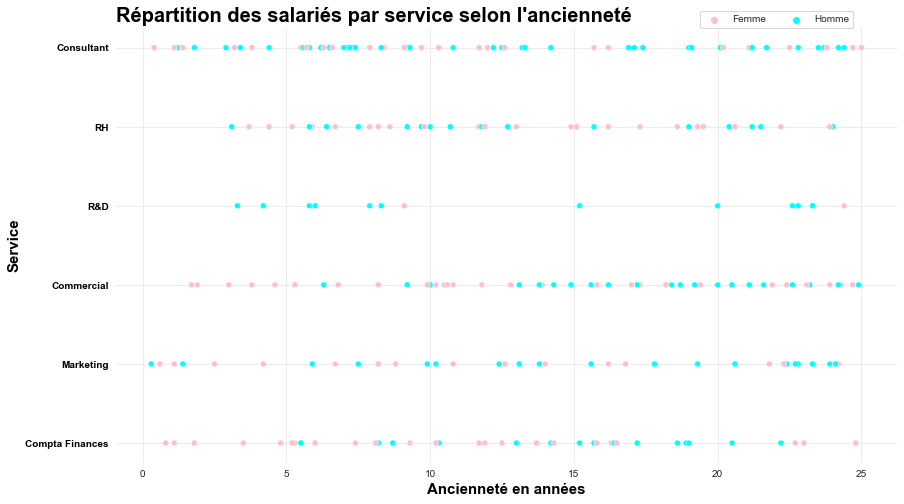

In [45]:
plt.figure(figsize=(14,8))
sns.scatterplot(x="Ancienneté_an", y="Service", hue="Sexe", data=df_oc, palette=["pink","cyan"])

plt.title("Répartition des salariés par service selon l'ancienneté", **conf_graph["title_style"])
plt.xlabel("Ancienneté en années", **conf_graph["label_style"])
plt.ylabel("Service", **conf_graph["label_style"])
plt.yticks(**conf_graph["tick_style"])
plt.legend(bbox_to_anchor =(0.95,1.05), ncol = 2)

plt.savefig('OC_15_scatter_service_ancienneté.png')
plt.show()

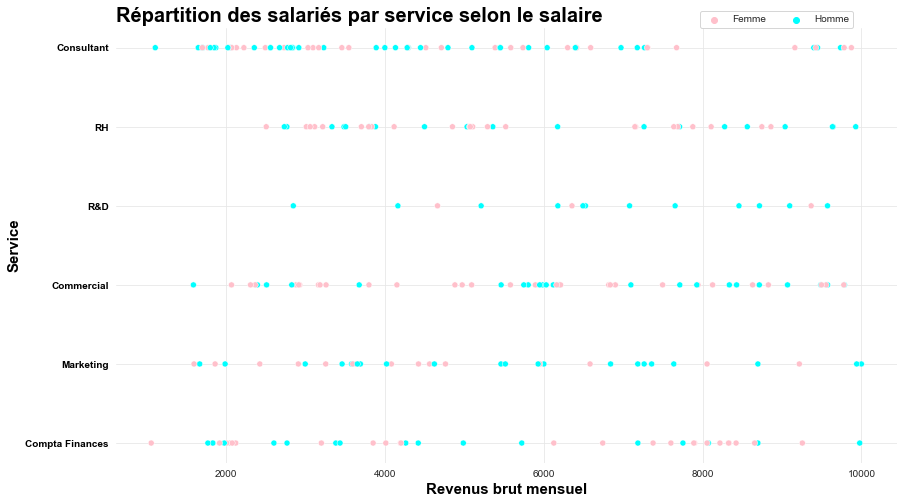

In [46]:
plt.figure(figsize=(14,8))
sns.scatterplot(x="Salaire_brut_mens", y="Service", hue="Sexe", data=df_oc, palette=["pink","cyan"])

plt.title("Répartition des salariés par service selon le salaire", **conf_graph["title_style"])
plt.xlabel("Revenus brut mensuel", **conf_graph["label_style"])
plt.ylabel("Service", **conf_graph["label_style"])
plt.yticks(**conf_graph["tick_style"])
plt.legend(bbox_to_anchor =(0.95,1.05), ncol = 2)

plt.savefig('OC_16_scatter_service_salaire.png')
plt.show()

In [47]:
df_oc.groupby(['Service']).mean().round(2)

,Salaire_brut_mens,Ancienneté_an,Age
Service,,,
Commercial,5936.60,15.04,51.42
Compta Finances,5227.31,12.24,51.71
Consultant,4485.21,11.97,52.77
Marketing,5124.31,13.38,50.33
R&D,6826.22,13.36,52.53
RH,5679.55,13.43,52.51


In [48]:
temp_men.groupby(['Service']).mean().round(2)

,Salaire_brut_mens,Ancienneté_an,Age
Service,,,
Commercial,6367.16,16.97,51.13
Compta Finances,4747.00,14.40,53.88
Consultant,4201.78,12.45,53.33
Marketing,5596.91,14.80,49.14
R&D,6833.86,13.56,52.75
RH,6034.29,13.72,50.74


In [49]:
temp_wom.groupby(['Service']).mean().round(2)

,Salaire_brut_mens,Ancienneté_an,Age
Service,,,
Commercial,5595.11,13.50,51.66
Compta Finances,5567.52,10.71,50.17
Consultant,4853.67,11.34,52.03
Marketing,4462.67,11.39,52.00
R&D,6795.68,12.57,51.67
RH,5398.72,13.21,53.92
